## Імпортування бібліотек

In [2]:
from seaborn import load_dataset
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import root_mean_squared_error, r2_score
import numpy as np

## Завантаження даних

In [3]:
df = pd.read_csv('data/icecream.csv')
df.head()

,temperature,weekend,sales,date
0,31.4,0,144,2023-01-01
1,23.7,0,165,2023-01-02
2,27.0,0,164,2023-01-03
3,31.7,0,192,2023-01-04
4,32.2,0,215,2023-01-05


## Форматування дати

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df = df.asfreq('D')

## Візуалізація

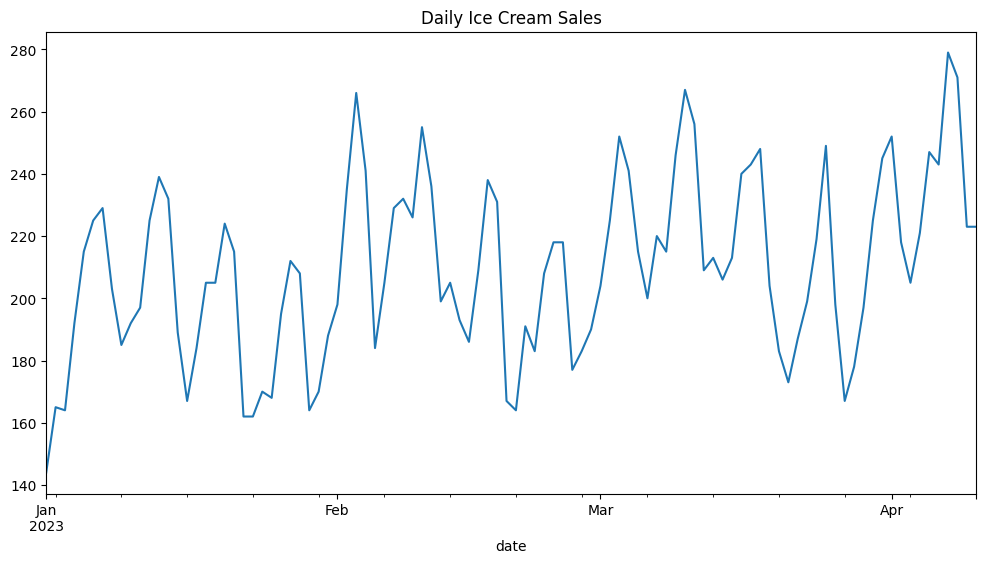

In [5]:
df['sales'].plot(title='Daily Ice Cream Sales', figsize=(12, 6))
plt.show()

## ACF та PACF

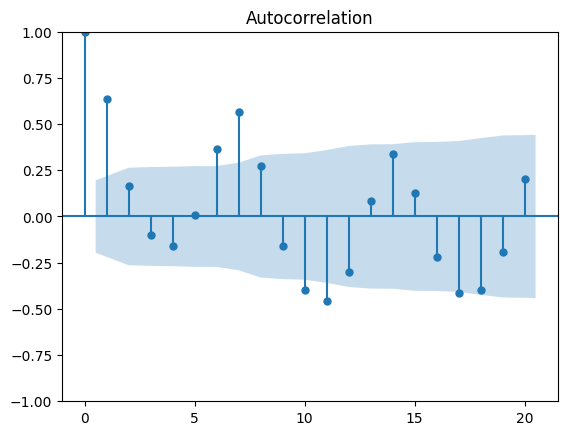

In [ ]:
plot_acf(df['sales'])
plt.title("Autocorrelation")
plt.show()

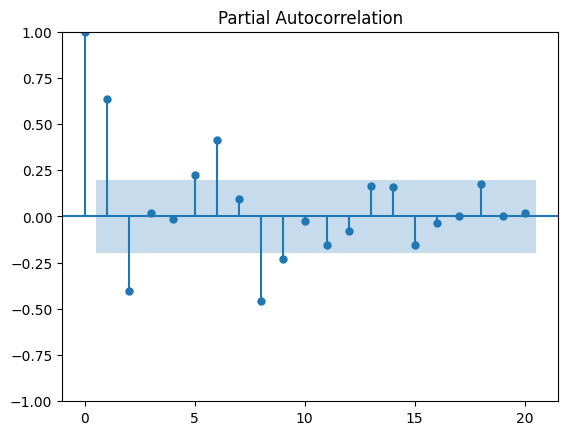

In [10]:
plot_pacf(df['sales'])
plt.title('Partial Autocorrelation')
plt.show()

## Train Test Split
* Будуємо прогноз на тиждень

In [51]:
train, test = df[:-7]['sales'], df[-7:]['sales']
temp_train, temp_test = df[:-7]['temperature'], df[-7:]['temperature']
weekend_train, weekend_test = df[:-7]['weekend'], df[-7:]['weekend']

## Моделювання
* Натренуйте модель `ARIMA`
* Можна використати також `temperature` у якості додаткового предиктора
* Візуалізуйте результат
* Порахуйте метрики на тестувальній вибірці

In [13]:
model = ARIMA(train,
              order=(1, 1, 1))
model_fit= model.fit()

In [23]:
forc = model_fit.get_forecast(steps=len(test))
preds = forc.predicted_mean

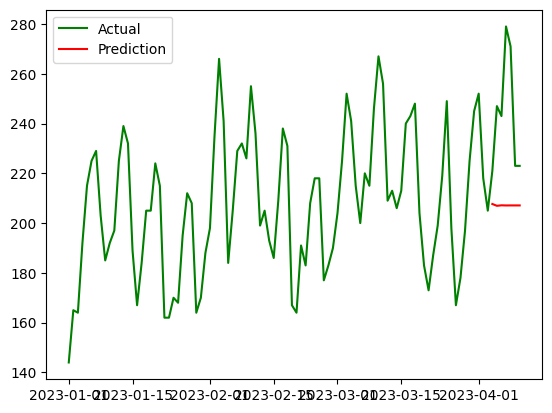

In [24]:
plt.plot(df['sales'], label='Actual', color='green')
plt.plot(preds, label='Prediction', color='red')
plt.legend()
plt.show()

In [25]:
model = ARIMA(train,
              order=(1,1,1),
              seasonal_order=(1,1,1,7))
model_fit = model.fit()

c:\Users\Стас\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [32]:
forc = model_fit.get_forecast(steps=len(test))
preds = forc.predicted_mean
conf_inter = forc.conf_int()

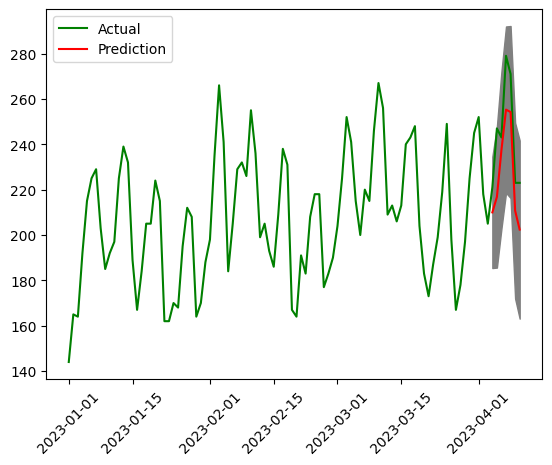

In [35]:
plt.plot(df['sales'], label='Actual', color='green')
plt.plot(preds, label='Prediction', color='red')
plt.fill_between(test.index,
                 conf_inter.iloc[:,0],
                 conf_inter.iloc[:,1], color='grey')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [43]:
model = ARIMA(train,
              order=(1,1,1),
              seasonal_order=(1,1,1,7),
              exog=temp_train)
model_fit = model.fit()

c:\Users\Стас\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [45]:
forc = model_fit.get_forecast(steps=len(test), exog=temp_test)
preds = forc.predicted_mean
conf_inter = forc.conf_int()

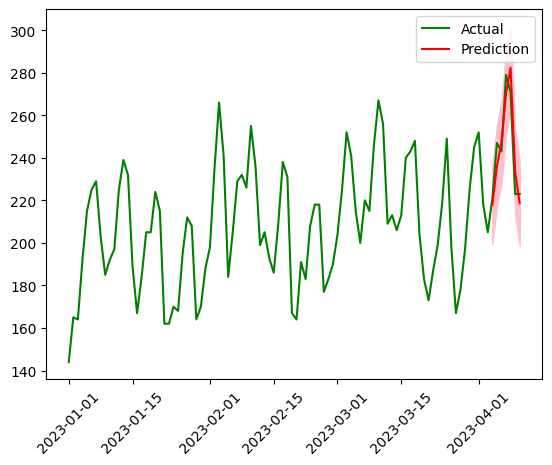

In [62]:
plt.plot(df['sales'], label='Actual', color='green')
plt.plot(preds, label='Prediction', color='red')
plt.fill_between(test.index,
                 conf_inter.iloc[:,0],
                 conf_inter.iloc[:,1], color='pink')
plt.legend()
plt.xticks(rotation=45)
plt.show()